<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
import numpy as np
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz',compression='gzip')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [2]:
past['Purchased?'].mean()


0.3438

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [3]:
X = past.drop(columns=['user_id', 'product_id'])
y =X.pop('Purchased?')

In [4]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5, random_state=0, whiten=True)
X_reduced = pca.fit_transform(X_scaled)


In [6]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [7]:
pca.explained_variance_ratio_

array([0.10282299, 0.09445816, 0.06513061, 0.05112375, 0.04251041])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [8]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [9]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

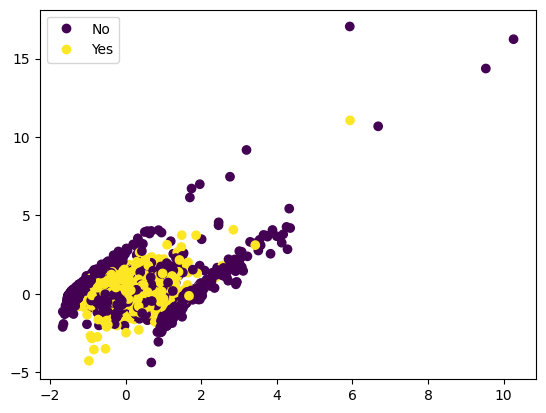

In [10]:
visualize_2pcs(X_reduced,y)

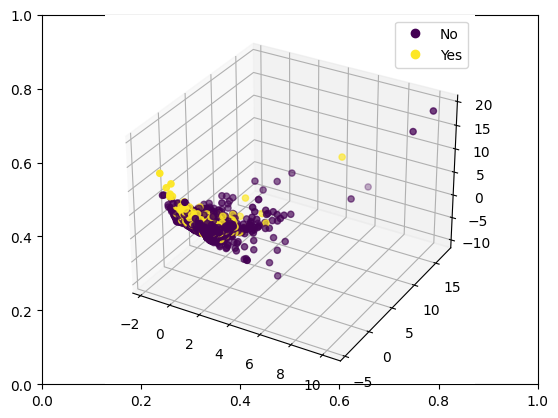

In [11]:
visualize_3pcs(X_reduced,y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [12]:
# YOUR CODE HERE (imports!)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    if standardize:
        pipe = make_pipeline(StandardScaler(),LogisticRegression(class_weight='balanced'))
    else:
        pipe = make_pipeline(LogisticRegression(class_weight='balanced'))

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    target_names = ['Did not purchase' ,'Pucrhased']
    #report = classification_report(y_test, y_pred,target_names =target_names)

    return print(classification_report(y_test, y_pred,target_names =target_names))




Now apply the pipeline on the all the features `X` and review the performance

In [13]:
train(X, y, standardize = True)

                  precision    recall  f1-score   support

Did not purchase       0.75      0.77      0.76       649
       Pucrhased       0.55      0.52      0.54       351

        accuracy                           0.68      1000
       macro avg       0.65      0.65      0.65      1000
    weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [14]:
train(X_reduced, y, standardize = True)

                  precision    recall  f1-score   support

Did not purchase       0.74      0.70      0.72       649
       Pucrhased       0.49      0.54      0.51       351

        accuracy                           0.64      1000
       macro avg       0.61      0.62      0.62      1000
    weighted avg       0.65      0.64      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 

With only 5 components, X_reduced df had an accuracy of 64% compared to 68% accuracy with the dataset of 34 features. With decreased featured set, we are capturing most of the signal though not all.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different values of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer:

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [15]:
from sklearn.cluster import KMeans

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeanModel = KMeans(n_clusters=k, random_state=10).fit(X_reduced)
        inertias.append(kmeanModel.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

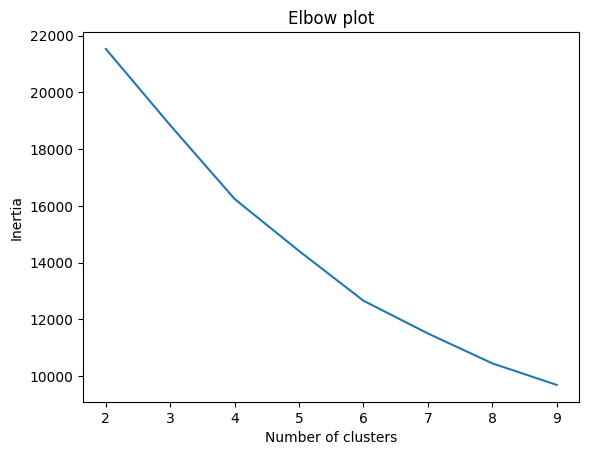

In [16]:
ks = range(2,10)
visualize_elbow(X,ks)

Based on the elbow plot, the optimum number of clusters seem to be around 7-9. For more condensed comprehensive clusters, we choose the lower threshold and for more defined precise clusters we choose higher number of clusters. We are essentially looking to minimize the number of clusters with reasonable inertia.

4. What are the disadvantage to use the Elbow method? 

There is no precise, rigorous optimum way to define the number of clusters based on the elbow plot and is subjective to user interpretation.
Besides interpretation, we have to account for computational cost.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [17]:
from utils2 import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.8993912307892715
For n_clusters = 3 The average silhouette_score is : 0.8325567959468976
For n_clusters = 4 The average silhouette_score is : 0.7978269344901815
For n_clusters = 5 The average silhouette_score is : 0.7949253715938491
For n_clusters = 6 The average silhouette_score is : 0.7888706781669649
For n_clusters = 7 The average silhouette_score is : 0.778257882142008
For n_clusters = 8 The average silhouette_score is : 0.7789559543996923


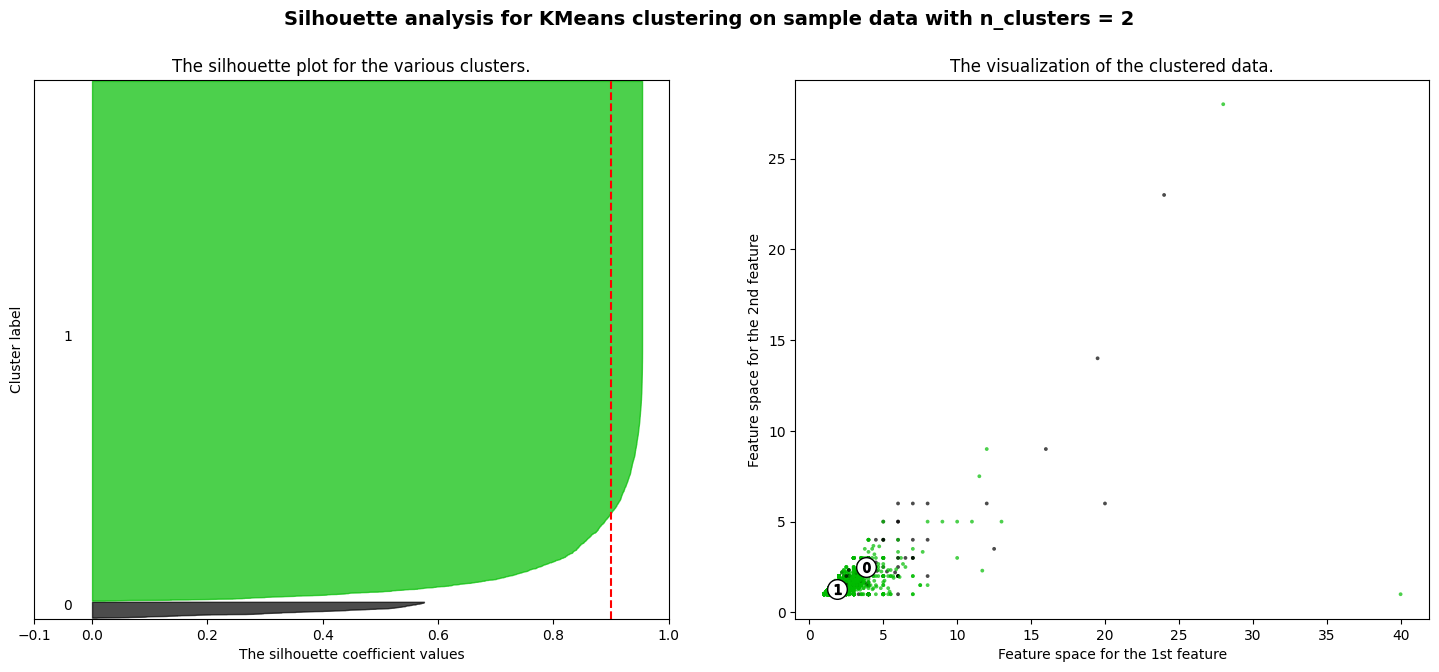

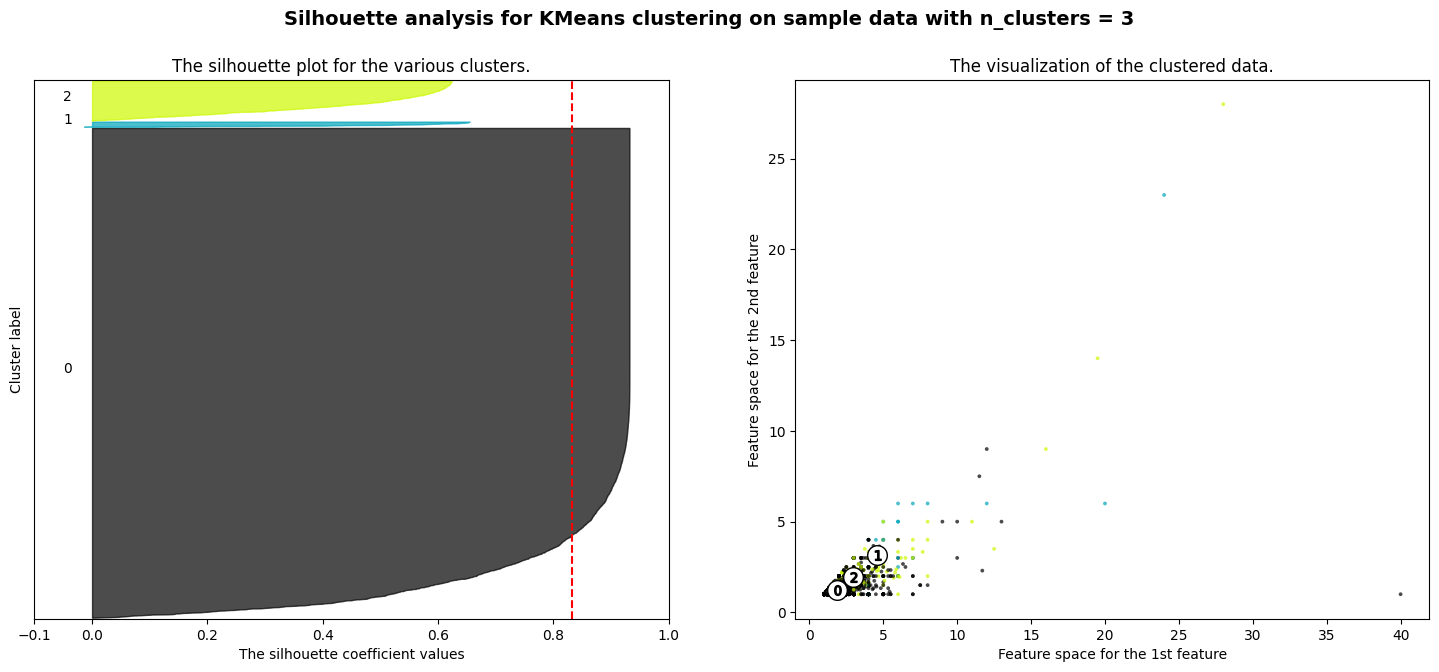

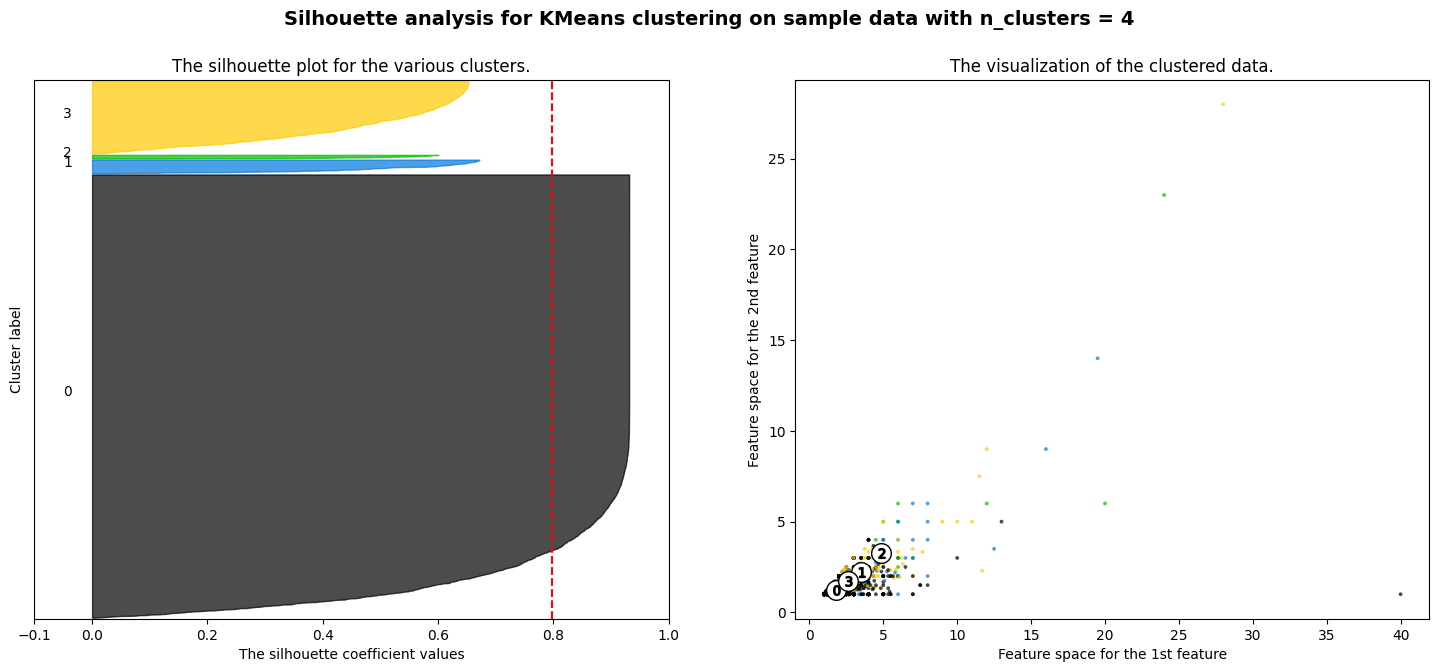

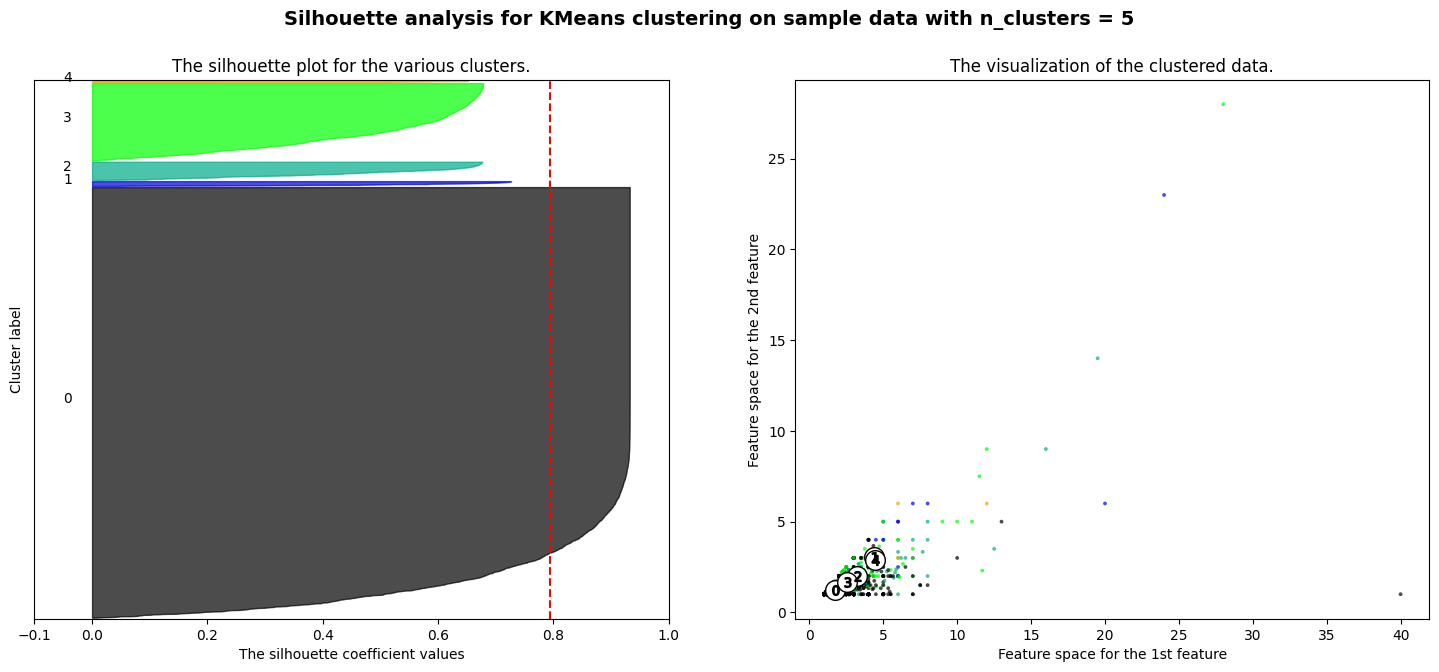

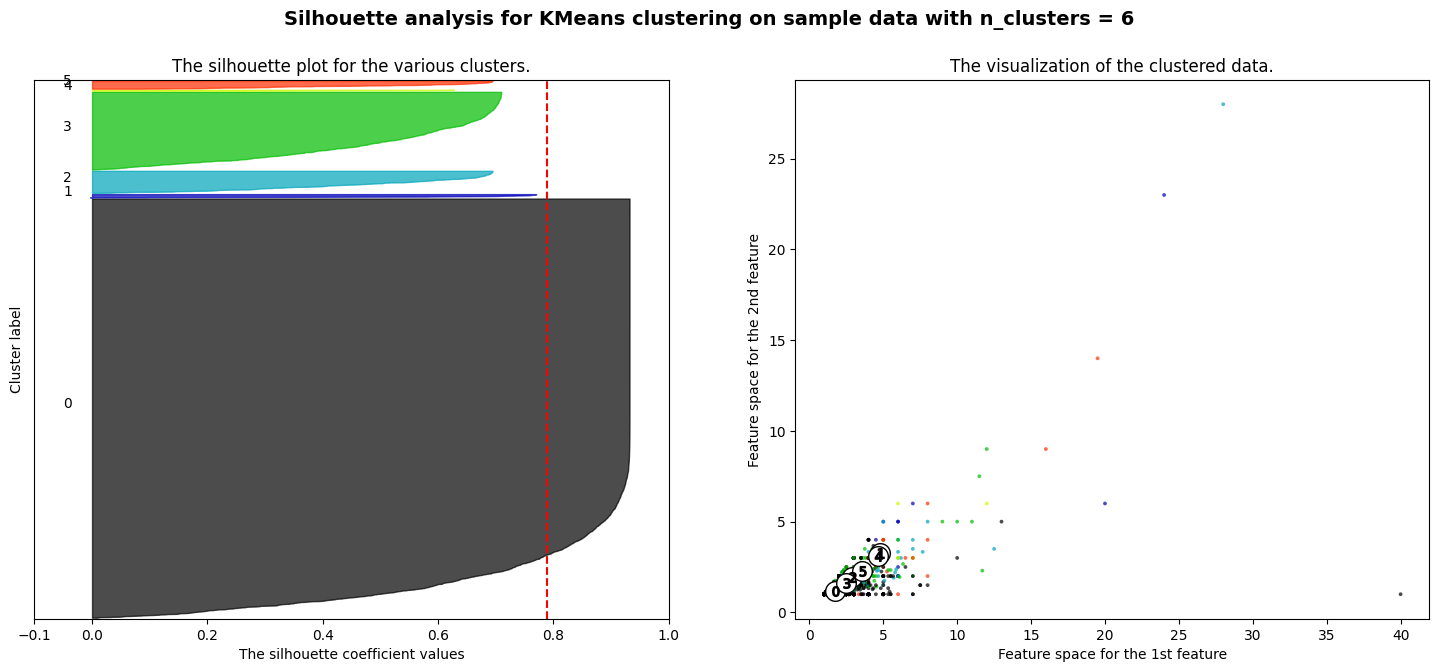

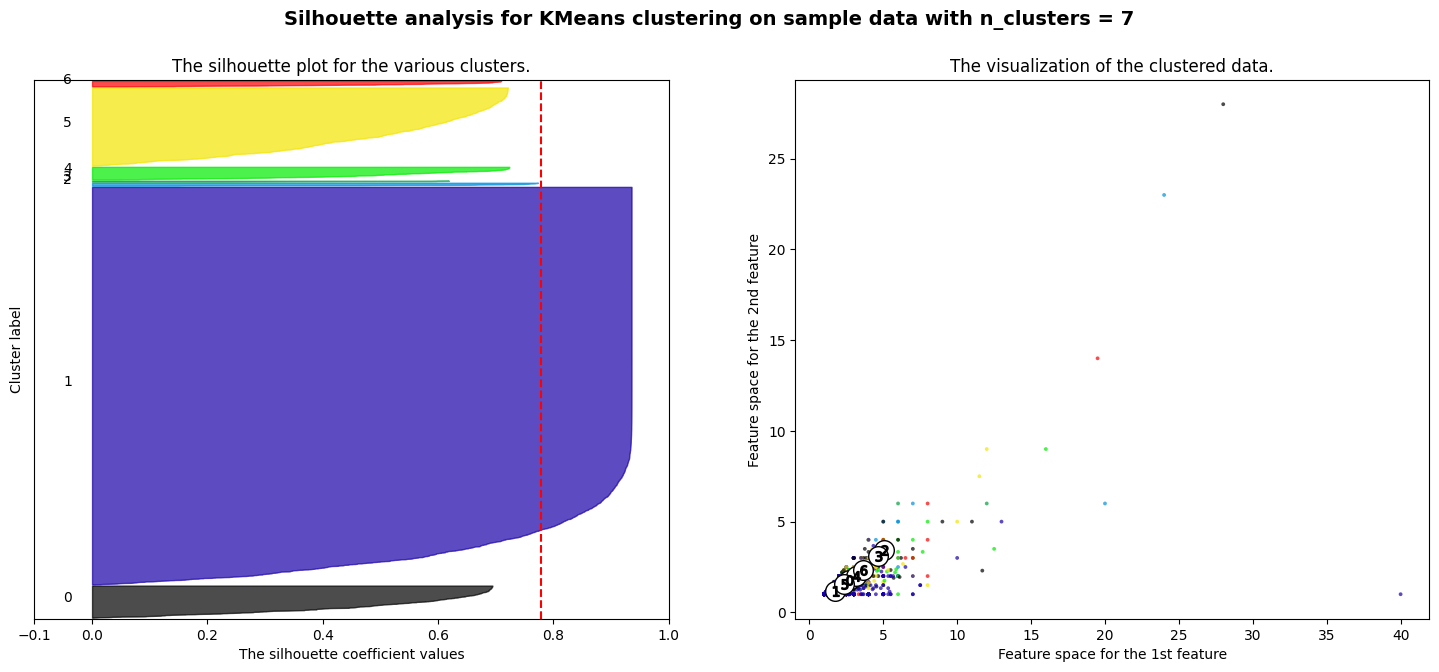

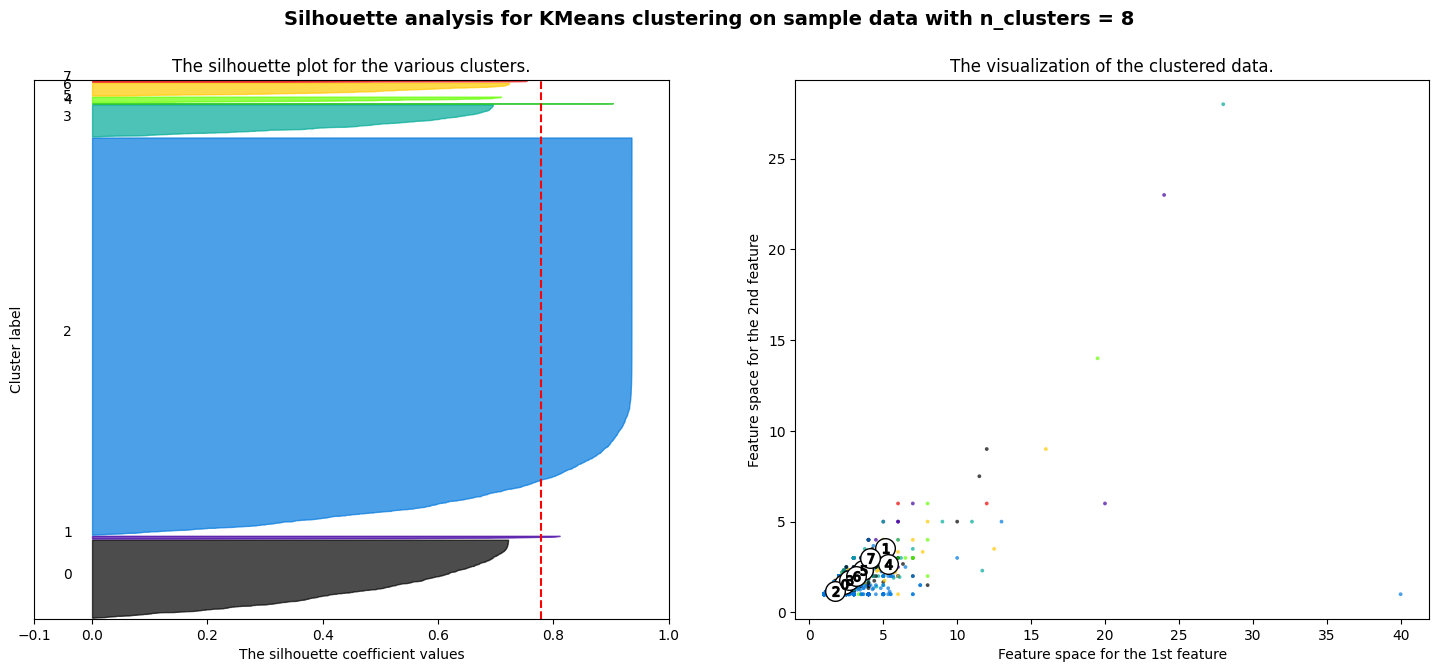

In [18]:
visualize_silhouette(8, X, random_state=10)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [19]:
km = KMeans(n_clusters=7, random_state=10).fit(X_reduced)
cluster_label = km.labels_

7. What is the size of each cluster? 

In [20]:
import numpy as np
np.unique(cluster_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([1222,  200,  138,   35, 1764,    3, 1638]))

Clusters 4 and 6 are the largest with 35% and 33% respectively, while cluster 0 accounts for 24% of data. The remaining clusters together account for 7% of data.

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [21]:
past['cluster_pca'] = pd.Series(cluster_label, index = past.index)

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    Cluster 0: 'Early morningers': About 24% of data, mid-week (Tue-Thurs) shoppers, predominantly from 2019 and tend to shop early morning through noon.
    Cluster 1: 'Fan Base': About 4% of data, second to cluster 5 in interactivity (NumOfEventsInJourney, NumSessions, interactionTime, numCart etc...)
    Cluster 2: 'Heavy spenders': About 3% of data: Least interactionTime time but maxprices around $60 while other clusters are low $ ranges and don't spend much time InsessionCart or InsessionView.
    Cluster 3: 'The indecisives':only 0.7% of data - Least Numviews & NumCarts & most removers & spend most time in-session cart and least purchased volume
    Cluster 4: most predominant class in data (~35% of data) - generic user behavior
    Cluster 5: 'Rich Journeyers but low $ shoppers': small cluster of only 3 rows - but rich Journeyers - avg 23 events, great interactors ~22 sessions but low spenders, evening interactions only
    Cluster 6: 'Seasonal Nov & December shoppers': About 33% of data: Second highest max price,NumSessions,interactionTime cohort- post cluster 2

In [22]:
past.groupby('cluster_pca').describe().to_csv('stats.csv', index=False)

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and interpret results.

Assumptions:
    1) data points are distributed in a spherical fashion
    2) clusters are of similar sizes & density

In [23]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=10).fit(X_reduced)
dbscan_clusters = db.labels_

np.unique(dbscan_clusters, return_counts=True)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise_ = list(dbscan_clusters).count(-1)

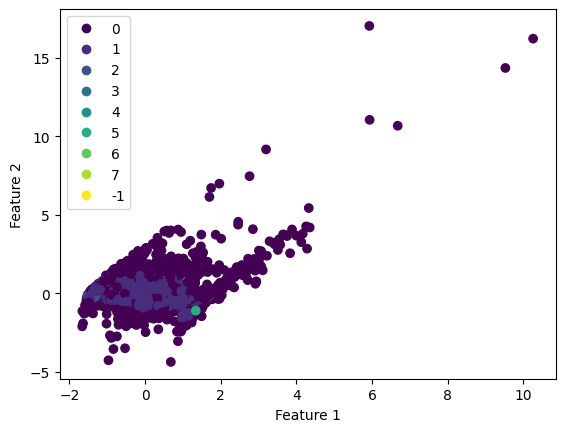

In [24]:
fig, ax = plt.subplots()
plot = ax.scatter(X_reduced[:,0], X_reduced[:,1], c= dbscan_clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
ax.legend(
    handles=plot.legend_elements()[0],
    labels=set(dbscan_clusters))


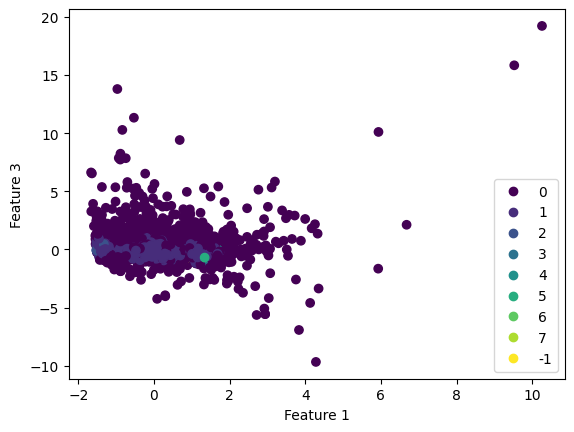

In [25]:
fig, ax = plt.subplots()
plot = ax.scatter(X_reduced[:,0], X_reduced[:,2], c= dbscan_clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 3")
ax.legend(
    handles=plot.legend_elements()[0],
    labels=set(dbscan_clusters))


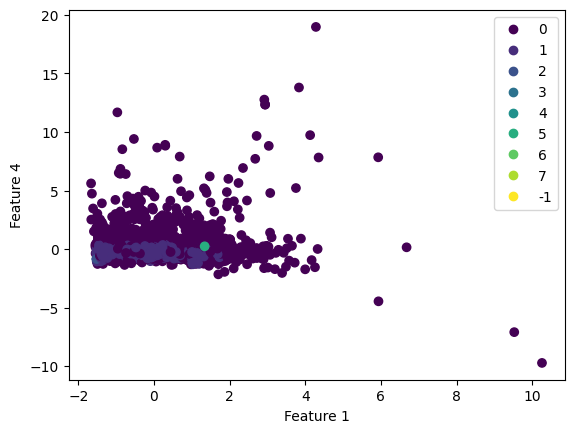

In [26]:
fig, ax = plt.subplots()
plot = ax.scatter(X_reduced[:,0], X_reduced[:,3], c= dbscan_clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 4")
ax.legend(
    handles=plot.legend_elements()[0],
    labels=set(dbscan_clusters))

11. Jot down recommendations or followup steps, detailing the reasons.

Assumptions:
1: Know the optimum parameters for epsilon and min-points (usually try-error)
2: Densities across all clusters are same
3: Cluster sizes or standard deviations are the same

Results:
Non-spherical data points captured well
Not all clusters are of same size

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the first few rows.

In [27]:
new = pd.read_csv('../dat/new.csv.gz', compression='gzip')
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30091 entries, 0 to 30090
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  30091 non-null  int64  
 1   maxPrice    30091 non-null  float64
 2   minPrice    30091 non-null  float64
 3   Purchased?  30091 non-null  int64  
 4   Category    30091 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.1 MB


In [28]:
assert new.shape == (30091, 5)

In [29]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

 Past dataset has 5000 data points and 38 features vs 'new' that has a larger training volume of 30091 rows but fewer (5) features.

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [30]:
if set(past.columns) & set(new.columns):
    print(set(past.columns) & set(new.columns))

{'Category', 'maxPrice', 'product_id', 'minPrice', 'Purchased?'}


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [31]:
past['Purchased?'].mean()
new['Purchased?'].mean()

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [41]:
X_train =past[new.columns]
X_train.pop('product_id')
y_train = X_train.pop('Purchased?').to_numpy()
X_train = X_train.to_numpy()

X_test =new.drop(columns=['product_id','Purchased?']).to_numpy()
y_test = new['Purchased?'].to_numpy()

In [42]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [44]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [45]:
X = np.concatenate((X_train,X_test), axis=0)
X

array([[15.84      , 15.84      ,  1.        ],
       [ 5.8       ,  5.565     ,  1.        ],
       [ 6.2725    ,  6.2725    ,  1.        ],
       ...,
       [ 6.35      ,  6.35      ,  1.83333333],
       [ 3.4725    ,  3.4725    ,  1.        ],
       [ 5.56      ,  5.56      ,  1.        ]])

In [46]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [51]:
y = np.concatenate((y_train,[-1]*30091), axis=0)

In [52]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [53]:
from sklearn.semi_supervised import LabelSpreading

lp_model = LabelSpreading(alpha=0.01, kernel='knn')
lp_model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [63]:
#len(y_test)
semi_sup_preds = lp_model.transduction_[-len(y_test):]


In [64]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [65]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.80      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.81      0.77      0.79     30091
weighted avg       0.82      0.82      0.81     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [68]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



The primary areas of improvement are overall accuracy and recall - which was the primary driving metric behind this model as understocked/ unavailable products lead to dis-satisfied customers and bad user experience.
The increase in model performance can be attributed to the workings of label spreading - close by data points are probable to have the same label, and points in the same cluster are likely to have the same label.
Points in the dataset are linked in a graph on the basis of their comparative distances in the input space and weight matrix is computed and labels are applied on the basis of nodes that passed on the most data.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)